In [1]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from PIL import Image

**Watermark Embedding**

Let's load the grayscale host image and grayscale watermark image:

Host image:


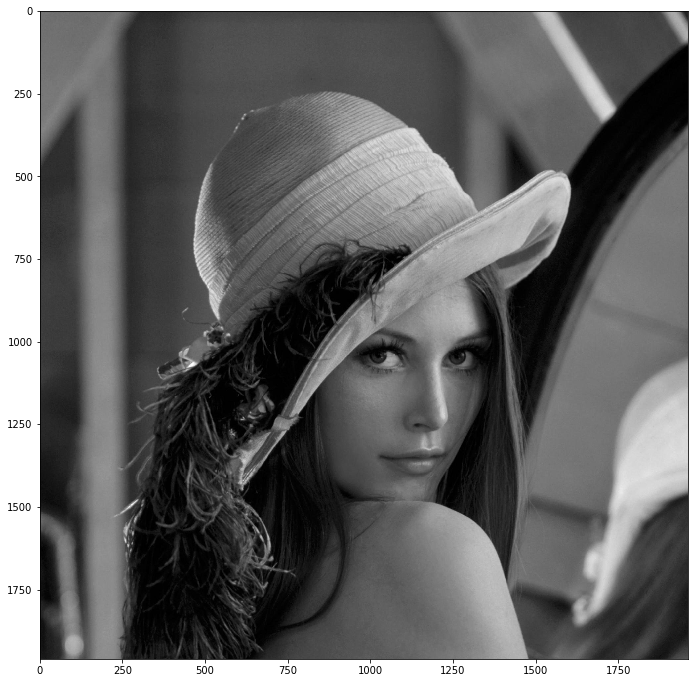

Watermark image:


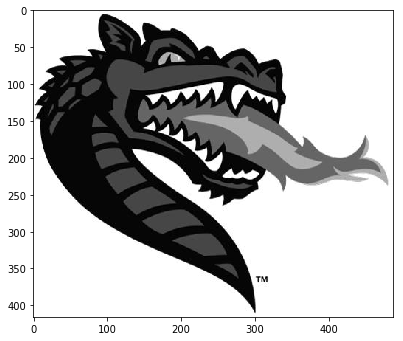

In [3]:
ImagePath_GS = 'lena_greyscale.jpg'
WatermarkImagePath_GS = 'logo_greyscale.jpg'

imat = Image.open(ImagePath_GS)
watermark_imat = Image.open(WatermarkImagePath_GS)

# Display the host image
print('Host image:')
fig = plt.figure(figsize=(15,9))
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(imat, cmap = 'gray')
plt.show()

# Display the watermark image
print('Watermark image:')
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(watermark_imat, cmap = 'gray')
plt.show()

Perform SVD both host and watermark image

In [4]:
Uh, Sh, Vht = svd(imat, full_matrices=False)
Uw, Sw, Vwt = svd(watermark_imat, full_matrices=False)

Set values for alpha and k

In [5]:
alpha = 0.2
k = 100

Add to the first k singular values of the watermark image to the first k singular values of the host image

In [6]:
Sm = Sh.copy()

for i in range(k):
    Sm[i] = Sm[i] + alpha*Sw[i]

From the resulting singular value matrix, contruct the watermarked image

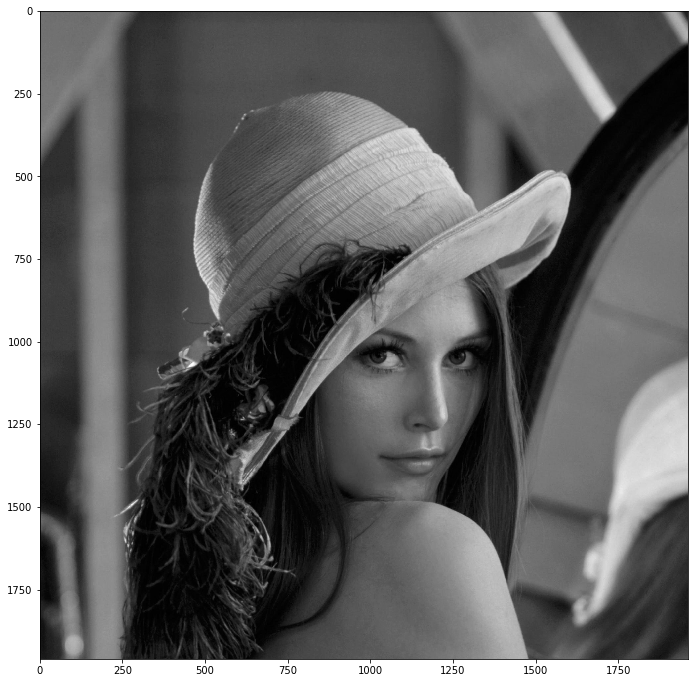

In [7]:
watermarked_img = Uh.dot(np.diag(Sm).dot(Vht))

# Display the watermarked image
fig = plt.figure(figsize=(15,9))
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(watermarked_img, cmap = 'gray')
plt.show()

Observation: we cannot find any differences between the watermarked image and the original host image by human eyes.

**Extracting the watermark image from the watermarked image**

Perform SVD on the watermarked image

In [10]:
Um, Sm_prime, Vmt = svd(watermarked_img, full_matrices=False)

From the resulting singular value matrix, calculate the first k singular values of the watermark image which were embedded into the host image previously

In [11]:
Sw_prime = np.zeros(Sw.shape)
for i in range(k):
    Sw_prime[i] = (Sm_prime[i] - Sh[i])/alpha

Let's see the difference in first k singular values of Sw and Sw_prime

In [12]:
sum = 0
for i in range(k):
    sum += abs(Sw[i]-Sw_prime[i])
print(sum)

2.4478481464029755e-09


How amazing! The first k singular values of the watermark image were extracted from the watermarked image with minor error.

Now let's reconstruct the watermark image from the extracted k singular values

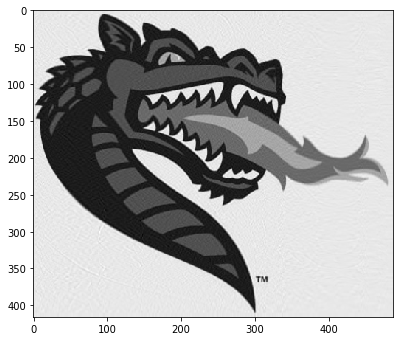

In [13]:
Recon = Uw.dot(np.diag(Sw_prime).dot(Vwt))

# Display the reconstructed watermark image
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(Recon, cmap = 'gray')
plt.show()

**However, it was pointed out that this method suffer severe false positive. The following example will confirm that.**

Let's load a different grayscale watermark image

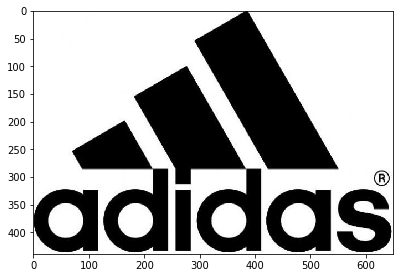

In [14]:
test_img = Image.open('test.jpg')

# Display the test watermark image
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(test_img, cmap = 'gray')
plt.show()

Perform SVD on the test image

In [15]:
test_Uw, test_Sw, test_Vwt = svd(test_img, full_matrices=False)

Calculate the first k singular values of the watermark image from the same watermarked image. The only difference this time is the size Sw_prime should follow the size of test_Sw.

In [17]:
Sw_prime1 = np.zeros(test_Sw.shape)
for i in range(k):
    Sw_prime1[i] = (Sm_prime[i] - Sh[i])/alpha

Try to reconstruct the test watermark image from the first k singular values of the true watermark image.

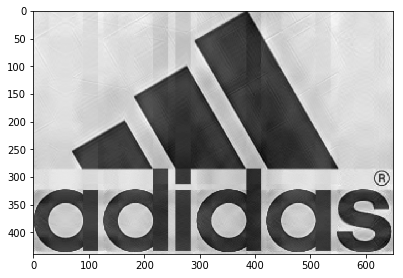

In [18]:
Recon1 = test_Uw.dot(np.diag(Sw_prime1).dot(test_Vwt))

# Display the image
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(Recon1, cmap = 'gray')
plt.show()

Interesting! The test image was well reconstructed even though we used the first k singular values of the true watermark image.

**Conclusion**

This method of image watermarking was an early-stage method of watermarking. Later research found that this method is subjected to a severe false positive problem: a different watermark can be extracted from the watermarked image by using different singular vector matrices.
<br/>Other better versions of SVD based image watermarking have been developed later on. However, this method serves the purpose of this paper to demonstrate the potential of SVD in Image Forensic domain. In essence, we can use SVD to embed information into an image without being discovered by naked eyes. The resulting image is basically the same as the original host image. And the most interesting thing is the embedded information can be perfectly extracted.